<a href="https://colab.research.google.com/github/AzadMehedi/ML-Algorithoms/blob/main/Extream_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix

In [2]:
url = 'https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-fuel-consumption.csv'
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# features and target variable
X= df[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']

In [8]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
xg_reg = xgb.XGBRegressor(objective='reg:linear', gamma=0, colsample_bytree=0.5, num_boost_round=100, learning_rate=1, scale_pos_weight=1)
model = xg_reg.fit(X_train, y_train)
predictions = xg_reg.predict(X_test)

[18:59:44] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[18:59:44] WARNING: ../src/learner.cc:767: 
Parameters: { "num_boost_round" } are not used.



In [14]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = model.score(X_test,y_test)
print('Accuracy: ',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))

MAE: 7.144644146024995
MSE: 389.9400973490536
RMSE: 19.746900955569043
Accuracy:  90.2145544013593 %
R2: 0.9021455440135929


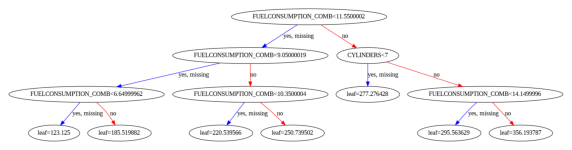

In [20]:
# By default tree visualization of Extream Gradient Boosting
xgb.plot_tree(xg_reg, num_tree=4)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

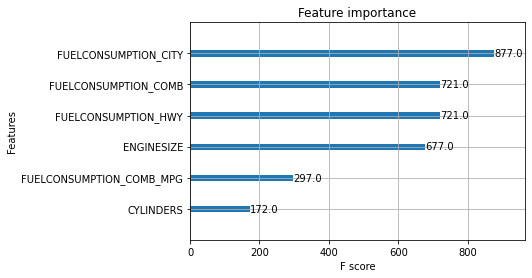

In [16]:
# By default feature importance visualization of Extream Gradient Boosting
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()